# Statistics, Visualization, Correlation

Today, we will continue our discussion of data exploration, and look for variables which co-occur together (*correlated variables*).

# Table of contents
[1. Data Exploration and Statistics](#1.-Data-Exploration-and-Statistics)
- mean, meadian, standard deviation
- correlation and causation

[2. Correlation](#1.-Correlation)

# 1. Data Exploration and Statistics

Our dataset is enormous - it is difficult to understand the data we have available just by looking at the Data Frame. 

Data Scientists and AI researchers start every project with *data exploration* - plotting and summarizing various attributes of the data to get a better idea of what the data looks like.

We learned a lot of useful ways to visualize data yesterday. Today, we will continue learning about data exploration.

We'll start by examining


In [ ]:
# First, we import the libraries we will use in this notebook and load the Fragile Families data. 
# The first line sets maplotlib plots to show inside the notebook.
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import sys
import ff_functions as fff

In [1]:
# Read in data
background = "../../ai4all_data/background.csv"
train = "../../ai4all_data/train.csv"

# Read in data
data_frame = pd.read_csv(background, low_memory=False)
data_frame = data_frame.set_index('challengeID')

Let's look at three variables:
* f2l1: Total household income before taxes/deductions (Year 2)
* f3l1: Total household income before taxes/deductions (Year 3)
* m5j1: Total household income before taxes/deductions (Year 9)

We're interested in understanding how income of families changes across the years. Let's start by looking at the mean and median of 

## 1.1. Histograms

In [2]:
incomes = fff.pick_ff_variables(data_frame, ["f2l1", "f3l1", "m5j1"], remove_nans=True, remove_negatives=True)
incomes.head()

,f2l1,f3l1,m5j1
challengeID,,,
4,31037.239985,49894.100586,52330.093001
9,23437.652319,24955.283838,51248.022497
11,19508.401102,40362.995906,26853.171229
13,26212.061488,18347.662082,9679.511515
22,44228.967925,32289.146143,21674.654791


In [3]:
incomes.columns

Index(['f2l1', 'f3l1', 'm5j1'], dtype='object')

First, let's plot a histogram of the income.

We included the following function in the **`ff_functions.py`** file:

In [4]:
'''
Plot a histogram based on a 1D DataFrame
'''
def plot_histogram(data, labels=[], xlabel="", ylabel="", title=""):
    max_val = int(np.max(data.values))
    min_val = int(np.min(data.values))
    bins = np.linspace(min_val, max_val, min(max_val-min_val,50))
    fig = plt.figure(figsize=(7,7))
    if len(data.shape) > 1:
        for i,column in enumerate(data.columns):
            plt.hist(data[column], bins, alpha=1/len(data.shape), label=labels[i])
    else:
        plt.hist(data.values, bins, alpha=0.5, label=labels[0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="upper right")

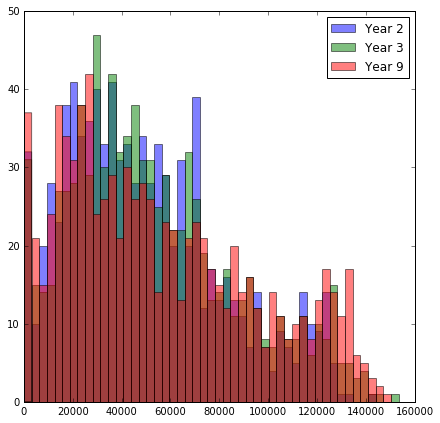

In [5]:
fff.plot_histogram(incomes, labels=["Year 2", "Year 3", "Year 9"])

Since we called

**`import ff_functions as fff`**

below, we can now call the function directly from the file:

You can see that most families are concentrated between 30,000 and 60,000, but some go as far as 160,000. 

We can also view incomes in different years one by one:

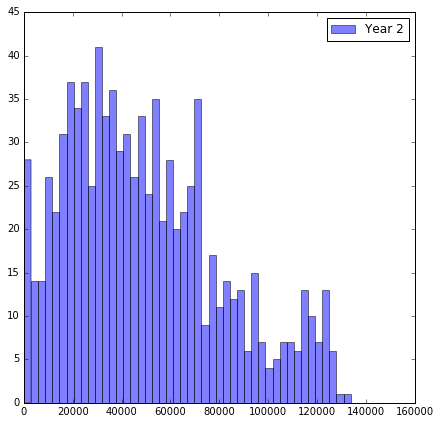

In [6]:
fff.plot_histogram(incomes.f2l1, labels=["Year 2"])

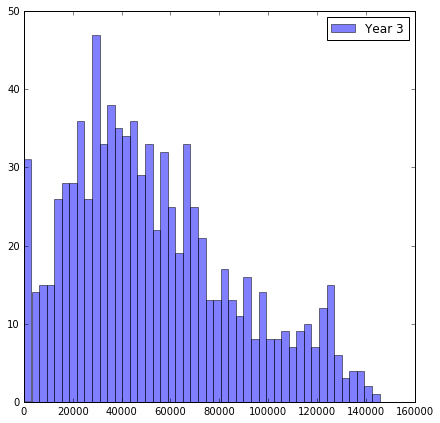

In [7]:
fff.plot_histogram(incomes.f3l1, labels=["Year 3"])

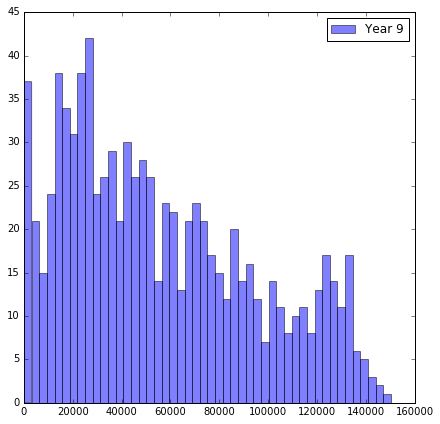

In [8]:
fff.plot_histogram(incomes.m5j1, labels=["Year 9"])

## 1.2 Mean and Median 
 
### Question 1.2.1: 
What do you think the means and medians will be for each?
### Answer:

We can use the pandas mean and median functions to calculate the values.

In [9]:
incomes.mean()

f2l1    49595.675268
f3l1    53186.063011
m5j1    55926.737885
dtype: float64

In [10]:
incomes.median()

f2l1    44084.943356
f3l1    46932.836165
m5j1    47707.741682
dtype: float64

### Question 1.2.1: 
What trend do you see in the relationship between the mean and median values? Why do you think that is?

(Hint: look at the histograms again).

### Answer:

One of the more common mistakes in data science is trusting the mean value too much. It is a mistake often made when reporting typical incomes in a country. Reporting a mean value averages out many lower earners and fewer higher earners and produces an unrepresentative in-between value. 
Often, knowing the median can help us get a better idea of what is a "typical", or most common, wage.

## 1.3 Standard Deviation
Standard deviation is a measure that is used to quantify the amount of variation or dispersion of a set of data values. Together with the mean and median, it can help us quantify the distribution of the data.

Low standard deviation means all values lie relatively close to the mean. High standard deviation means many values lie very far away from the mean.

In [11]:
incomes.std()

f2l1    31679.714645
f3l1    33792.459173
m5j1    38785.639411
dtype: float64

### Question 1.3.1: 
What trend do you see in the consecutive standard deviations as years progress? What does this mean about the wage gap?

(Hint: look at the histograms again).

### Answer:

## Outliers
However well we define our data, there may always be examples unlike any others. We call those "outliers".

## TODO: Example of an outlier

# 2. Correlation
Recall the examples of two scatterplots from yesterday: The year 1 vs year 9 and year 1 vs year 3 income:

## 2.1. Scatterplots
Scatter plots are graphs in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

We can visualize the changes of single family's income across any two years with a scatterplot.

Let's compare how the income changed between years 2 and 3 and years 2 and 9.

### Question 2.1.1.
How do you expect families' incomes to change across these two time frames?

### Answer:



Let's use a scatteplot function we define in the **`ff_functions.py`**  file:

In [16]:
'''
This function takes in two arrays of equal length (xdata, ydata)
and plots them against each other in a scatterplot
'''
def scatterplot(xdata, ydata, xlabel="", ylabel="", title=""):
    fig = plt.figure(figsize=(7,7))
    plt.scatter(xdata, ydata)
    #plt.plot([0,data_max],[0,data_max])
    plt.xlim(min(xdata)-1,max(xdata)+1)
    plt.ylim(min(ydata)-1,max(ydata)+1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

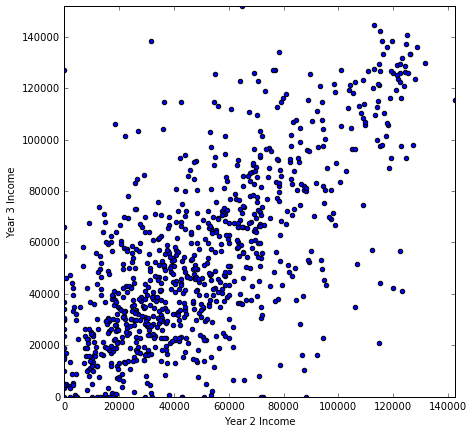

In [17]:
fff.scatterplot(incomes.f2l1, incomes.f3l1, xlabel = "Year 2 Income", ylabel = "Year 3 Income")

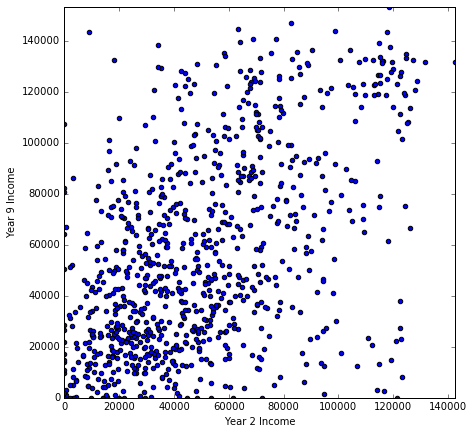

In [13]:
fff.scatterplot(incomes.f2l1, incomes.m5j1, xlabel = "Year 2 Income", ylabel = "Year 9 Income")

We can observe that Year 2 income and Year 3 income data points are concentrated along the diagonal, while  Year 2 income and Year 9 income data points are not. 
### Question 2.1.2: 
How do you interpret these two plots? How does the income distribution change between years 2 and 3 vs years 2 and 9?
### Answer:

## 2.2 Correlation

If you look at the plots above, you will see that there seems to be a relationship between the Incomes in consecutive years.

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. A positive correlation means that as you increase one of the variables, you would expect the second variable to increase too. A negative correlation means that as you increase one of the variables, you would expect the second variable to decrease.

We observe that we have a positive correlation between the incomes in consecutive year. (**Why?**)


We can compute the correlation by using the numpy corrcoef function which computes the Pearson correlation coefficient. The result is a number that lies between -1 and 1. -1 means that the variables are very strongly correlated in a negative way, 1 means that the variables are very strongly related in a positive way, and 0 means that the variables are not correlated with each other.

Note that the Pearson correlation is a linear correlation measure (only tells you about whether a line in a scatter plot captures the relationship between the variables) and does not provide information on any nonlinear relationship there might exist between the two variables.

In [21]:
# corrcoef returns what is known as the Pearson product-moment correlation coefficients. The correlation between the two
# variables is equal to the non-diagonal entries of the array.
Pearson_corr = np.corrcoef(incomes.f2l1, incomes.f3l1)
print(Pearson_corr)

# select a diagonal element
income_corr2_3 = Pearson_corr[0,1] # or equivalently Pearson_corr[1,0]

Pearson_corr = np.corrcoef(incomes.f2l1, incomes.m5j1)
print(Pearson_corr)

# select a diagonal element
income_corr2_9 = Pearson_corr[0,1] # or equivalently Pearson_corr[1,0]

print("Correlation between Incomes in Years 2 and 9: {0}".format(income_corr2_3))
print("Correlation between Incomes in Years 2 and 3: {0}".format(income_corr2_9))


[[ 1.          0.70529798]
 [ 0.70529798  1.        ]]
[[ 1.          0.51104765]
 [ 0.51104765  1.        ]]
Correlation between Incomes in Years 2 and 9: 0.7052979846390249
Correlation between Incomes in Years 2 and 3: 0.5110476536730737


### Question 2.2.1:
Interpret the different correlation values. What do they mean about the relationships between incomes in different years?
### Answer:

## 2.3 Correlation Matrices

We can visualize a correlation matrix of all the variables in a given dataframe using the following function (also defined in **`ff_functions.py`**

In [32]:
'''
This function takes in a 2D DataFrame and returns a correlation matrix heatmap for all variables
present in the frame.
'''
def get_corr_plot(frame):
    correlations = frame.astype(float).corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)

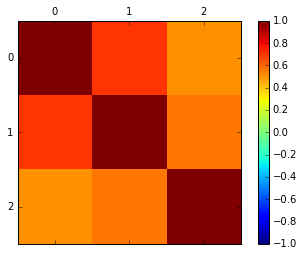

In [33]:
get_corr_plot(incomes)

The indices in the correlation plot correspond to the column indices in the provided dataframe.